# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
import networkx as nx
# import nxviz
import community
import pandas as pd
import matplotlib.pyplot as plt

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [2]:
basketball = pd.read_csv('./data/us_mens_basketball.csv')

In [3]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [4]:
def df_to_graph(df, entity, edge):
    
    '''
    Function that creates pairwise relationships from data sets 
    where rows represent entities.
    
    df = basketball dataset
    entity = names
    edges = games
    
    '''
    
    # Creates a copy of the data set anfd merge two datasets
    df2 = df.copy()
    
    # Merge on 'Games' column
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    
    # Create pairs
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    # print(graph_df)
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [5]:
graph_data = df_to_graph(basketball, 'Name','Games')
graph_data.sort_values(by='Games', ascending=False)

,Name_x,Name_y,Games
1557,LeBron Raymone James,Carmelo Kyan Anthony,3
282,Carmelo Kyan Anthony,LeBron Raymone James,3
1347,Karl Malone,Charles Wade Barkley,2
1487,Kobe Bean Bryant,LeBron Raymone James,2
429,"Christopher Paul ""Chris"" Mullin",Michael Jeffrey Jordan,2
...,...,...,...
905,Hakeem Abdul Olajuwon,"Reginald Wayne ""Reggie"" Miller",1
906,Hakeem Abdul Olajuwon,Scottie Maurice Pippen,1
907,Hakeem Abdul Olajuwon,Shaquille Rashuan O'Neal,1
908,Harrison Bryce Jordan Barnes,Carmelo Kyan Anthony,1


LeBron Raymone James and Carmelo Kyan Anthony have competed in the most Olympics together (3)

## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [6]:
# Source. A valid column name (string or integer) for the source nodes (for the directed case) --> Name_x
# Target. A valid column name (string or integer) for the target nodes (for the directed case). --> Name_y

G = nx.from_pandas_edgelist(df=graph_data, source='Name_x', target='Name_y');

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [7]:
print(f'Number of nodes: {G.order()}')
print(f'Number of edges: {G.size()}')
# Average degree: the average number of nodes that can be reached from a node in the graph and is a measure of how connected your graph is. 
print(f'Average degree: {round(sum(dict(G.degree()).values())/G.order(),3)}')
# Density: The percentage of the graph that can be reached by the average node. 
print(f'Density: {round(nx.density(G),3)}')

Number of nodes: 196
Number of edges: 1232
Average degree: 12.571
Density: 0.064


In [8]:
# Top 5 nodes with the highest centrality measures
def top_five(centrality_measure):
    """Gets the top-five nodes by betweenness"""
    top = list(reversed(sorted((centrality_measure, node)
                               for node, centrality_measure in centrality_measure.items())))[:5]
    return [node for centrality_measure, node in top]

## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [9]:
# Betweenness centrality tells us which nodes in our network are likely pathways for information.
betweenness = nx.betweenness_centrality(G, weight='edge')

# top5betweenness
top_five(betweenness)

['Gary Dwayne Payton',
 'Jason Frederick Kidd',
 'Carmelo Kyan Anthony',
 'David Maurice Robinson',
 'William Marion "Bill" Hougland']

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [10]:
# Eigenvector centrality measures related influence or who is closest to the most important nodes in the network. 
eigenvector = nx.eigenvector_centrality_numpy(G)

# top5_betweenness = betweenness.sort_values(ascending=False)
top_five(eigenvector)

['Carmelo Kyan Anthony',
 'LeBron Raymone James',
 'Christopher Emmanuel "Chris" Paul',
 'Kobe Bean Bryant',
 'Deron Michael Williams']

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [11]:
# Degree centrality is a measure of popularity based on a node's degree.
degree = nx.degree_centrality(G)

# top5 degree centrality
top_five(degree)

['Carmelo Kyan Anthony',
 'David Maurice Robinson',
 'Robert Albert "Bob" Kurland',
 'LeBron Raymone James',
 'William Marion "Bill" Hougland']

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

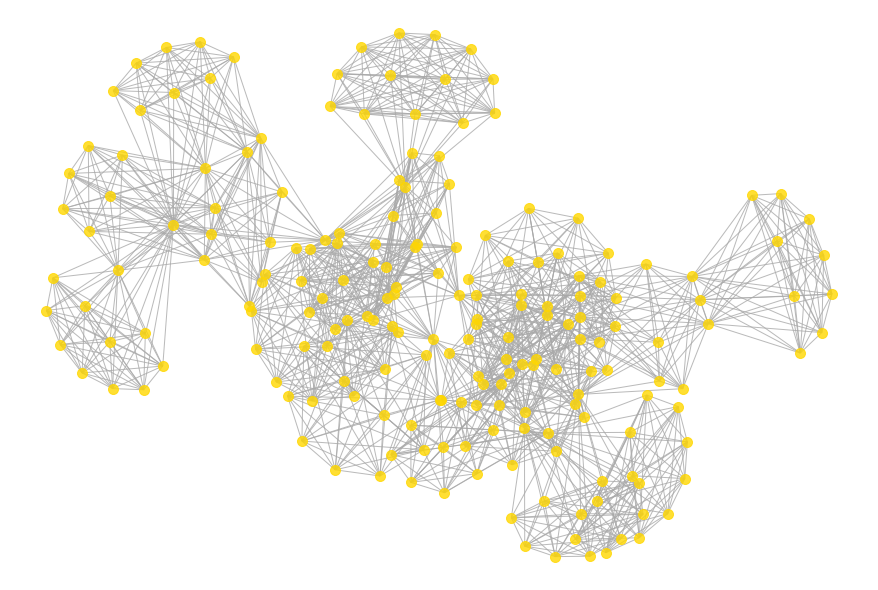

In [21]:
plt.figure(figsize=(12,8))

nx.draw_kamada_kawai(G, node_size=100, arrows=False, node_color='gold', edge_color='darkgrey', alpha=0.8)

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

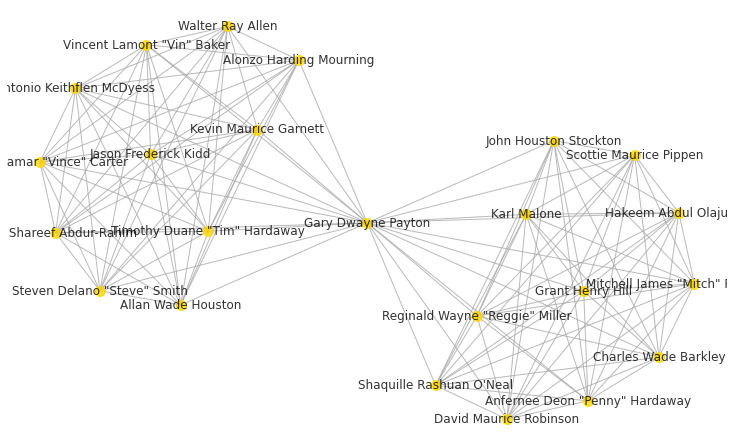

In [28]:
plt.figure(figsize=(10,6))

# Subgraphs
# The radius parameter specifies how many degrees away from the node to create the ego graph.
ego = nx.ego_graph(G, 'Gary Dwayne Payton', radius=1)

# Graph (Kamada-Kawai)
nx.draw_kamada_kawai(ego, node_size=100 , with_labels=True, node_color='gold', edge_color='darkgrey', alpha=0.8)

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

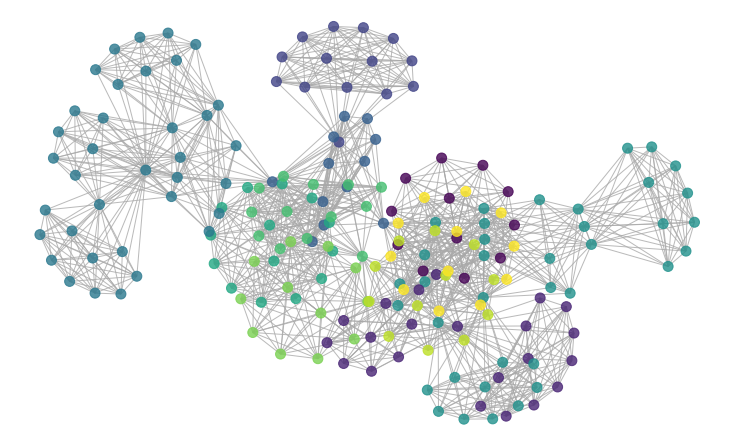

In [31]:
plt.figure(figsize=(10,6))

# Nodes in the graph to group together
parts = community.best_partition(G)

# Graph 
values = list(parts.values())
nx.draw_kamada_kawai(G, node_size=100 , node_color=values, edge_color='darkgrey', alpha=0.8)

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

In [33]:
graph_data1 = df_to_graph(basketball, 'Games','Name')
graph_data1.sort_values(by='Name', ascending=False)

,Games_x,Games_y,Name
23,1992 Summer,1996 Summer,5
38,2008 Summer,2012 Summer,5
41,2012 Summer,2008 Summer,5
25,1996 Summer,1992 Summer,5
32,2004 Summer,2008 Summer,4
36,2008 Summer,2004 Summer,4
20,1992 Summer,1984 Summer,3
16,1984 Summer,1992 Summer,3
24,1996 Summer,1988 Summer,2
46,2016 Summer,2012 Summer,2


In [34]:
HG = nx.from_pandas_edgelist(df=graph_data1, source='Games_x', target='Games_y');

In [35]:
print(f'Number of nodes: {HG.order()}')
print(f'Number of edges: {HG.size()}')
print(f'Average degree: {round(sum(dict(HG.degree()).values())/G.order(),3)}')
# Density: The percentage of the graph that can be reached by the average node. 
print(f'Density: {round(nx.density(HG),3)}')

Number of nodes: 13
Number of edges: 15
Average degree: 0.153
Density: 0.192


In [43]:
len(basketball.Games.unique())

18

In [39]:
# Betweenness centrality --> shortest path between nodes
betweenness = nx.betweenness_centrality(HG, weight='edge')

# top5betweenness
top_five(betweenness)

['2000 Summer', '2008 Summer', '1996 Summer', '1992 Summer', '1956 Summer']

In [40]:
# Eigenvector centrality defines centrality of a node as proportional to its neighbors’importance.
eigenvector = nx.eigenvector_centrality_numpy(HG)

# top5_betweenness = betweenness.sort_values(ascending=False)
top_five(eigenvector)

['2008 Summer', '2004 Summer', '2012 Summer', '2016 Summer', '2000 Summer']

In [41]:
# Degree centrality --> the number of links incident upon a node
degree = nx.degree_centrality(HG)

# top5 degree centrality
top_five(degree)

['2008 Summer', '2016 Summer', '2012 Summer', '2004 Summer', '1996 Summer']

### Generate a network visualization of this graph using the layout of your choice.

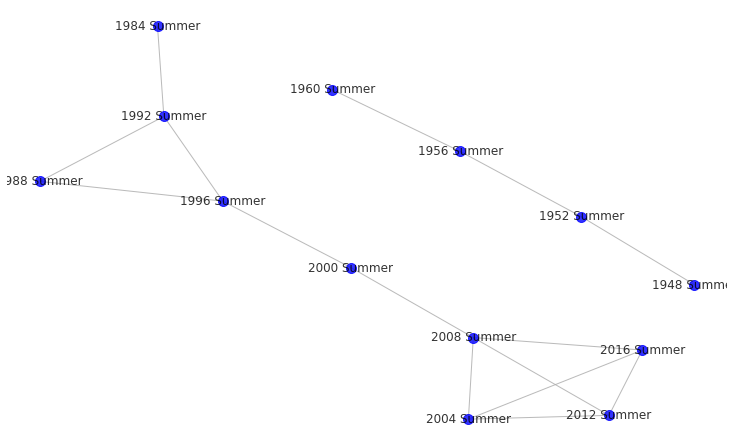

In [45]:
plt.figure(figsize=(10,6))

nx.draw_kamada_kawai(HG, node_size=100 , with_labels=True, node_color='blue', edge_color='darkgrey', alpha=0.8)